In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
% matplotlib inline


In [4]:
services = pd.read_csv('drive-download-20180422T230536Z-001/services_service.csv')
services.head()

,id,service_type,cancellation_policy,can_provide_oral_medication,can_provide_injected_medication,senior_dog_experience,special_needs_experience,takes_small_dogs,takes_medium_dogs,takes_large_dogs,takes_puppies,max_dogs,provider_id,fee,price,added
0,77127,boarding,strict,1,0,1,1,0,1,0,0,2,1,0.15,35,2015-07-12 15:13:16.673652
1,77128,boarding,strict,1,0,1,0,1,0,0,1,2,2,0.15,35,2015-07-12 13:44:21.949482
2,77129,dog-walking,flexible,1,0,1,0,1,1,0,1,6,3,0.15,24,2015-07-12 11:36:06.992714
3,77130,dog-walking,flexible,0,0,1,0,1,1,1,1,3,4,0.15,24,2015-07-12 12:23:43.627071
4,77131,boarding,strict,1,0,1,1,1,1,1,1,5,5,0.15,34,2015-07-12 07:40:36.724086


In [5]:
services.shape

(21584, 16)

In [6]:
conversations = pd.read_csv('drive-download-20180422T230536Z-001/conversations_conversation.csv')
conversations.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,208294,2017-06-06,2017-06-09,3,2017-05-25 17:06:35.796792,102,NaN,64416,81642,2017-05-26 21:02:09.499404,NaN
1,208295,2017-07-16,2017-07-25,9,2017-07-07 06:07:08.053227,324,NaN,64415,79559,NaN,NaN
2,208296,2017-06-06,2017-06-12,6,2017-05-26 17:47:38.312937,102,NaN,64414,91348,2017-05-29 01:27:14.256611,NaN
3,208297,2017-06-20,2017-06-25,5,2017-06-10 10:13:55.357196,420,provider,64413,87158,2017-06-15 15:00:33.124108,2017-06-18 00:06:25.278723
4,208298,2017-05-25,2017-05-28,3,2017-05-15 10:00:03.702143,66,NaN,64411,82832,2017-05-16 00:40:10.332902,NaN


In [7]:
conversations.shape

(79743, 11)

In [8]:
conversation_review = pd.read_csv('drive-download-20180422T230536Z-001/conversations_review.csv')

In [9]:
conversation_review.head()

,id,content,stars,conversation_id,reviewer_id
0,73828,Curae donec quam quisque quam.,4,208294,2617
1,73829,Risus donec scelerisque ultrices commodo nulla.,5,208296,64414
2,73830,Morbi etiam neque ornare curae senectus nunc b...,5,208298,3312
3,73831,Lorem ipsum orci velit varius adipiscing nulla.,5,208299,64410
4,73832,Morbi magna sed fusce facilisis orci condiment...,5,208302,64407


# 1. Possible Services and Average Price

In [10]:
types = list(services.service_type.unique())
types

['boarding', 'dog-walking', 'day-care']

In [11]:
#SQL Query
'''
SELECT DISTINCT(service_type), AVG(price) as average_price
FROM services_service
GROUP BY service_type;
'''

'\nSELECT DISTINCT(service_type), AVG(price) as average_price\nFROM services_service\nGROUP BY service_type;\n'

In [14]:
average_per_service = pd.read_csv('avg_per_service.csv')
average_per_service.head()

,service_type,average_price
0,boarding,34.506077
1,day-care,27.013689
2,dog-walking,21.982185


In [15]:
# There are 3 different services, booking, day-care, dog-walking.
# The average prices are $34.51, $27.01, and $21.98, respectively.

# 2. Requests per Service and Percentage Booked

In [16]:
#Going to have to run an SQL query between services_service and conversations_conversation.
#Keys are going to be id and service_id, respectively. 

In [ ]:
#SQL Query
'''
SELECT DISTINCT service_type, COUNT(requester_id) as num_requests, COUNT(booked_at) as num_booked
 FROM services_service a
 JOIN conversations_conversation b
 ON a.id = b.service_id
 GROUP BY service_type;
'''

In [17]:
bookings = pd.read_csv('bookings_per_type.csv')
bookings.head()

,service_type,num_requests,num_booked
0,boarding,26665,10862
1,day-care,26362,9417
2,dog-walking,26716,12811


In [18]:
bookings['booking_rate'] = (bookings.num_booked / bookings.num_requests) * 100
bookings.head()

,service_type,num_requests,num_booked,booking_rate
0,boarding,26665,10862,40.735046
1,day-care,26362,9417,35.721872
2,dog-walking,26716,12811,47.952538


# 3. What are the cancellation rates for each service?

In [19]:
#Going to run essentially the same query as above but this time.
#However we will look at the cancelled_at column instead. 

In [ ]:
#SQL Query
'''
SELECT DISTINCT service_type, COUNT(requester_id) as num_requests, COUNT(booked_at) as num_booked
 FROM services_service a
 JOIN conversations_conversation b
 ON a.id = b.service_id
 GROUP BY service_type;
'''

In [20]:
cancellations = pd.read_csv('cancellations_per_type.csv')
cancellations.head()

,service_type,num_requests,num_booked,num_cancelled
0,boarding,26665,10862,1051
1,day-care,26362,9417,919
2,dog-walking,26716,12811,1218


In [21]:
#Can only cancel if you have booked, therefore we need to include booked information.
cancellations['cancellation_rate'] = (cancellations.num_cancelled / cancellations.num_booked) * 100
cancellations.head()

,service_type,num_requests,num_booked,num_cancelled,cancellation_rate
0,boarding,26665,10862,1051,9.675934
1,day-care,26362,9417,919,9.758947
2,dog-walking,26716,12811,1218,9.507455


In [22]:
#Okay lets add it all together in a table that makes sense and is easy to look at. 

In [23]:
booking_table = pd.merge(cancellations, bookings, on=['service_type', 'num_requests', 'num_booked'])
booking_table.head()

,service_type,num_requests,num_booked,num_cancelled,cancellation_rate,booking_rate
0,boarding,26665,10862,1051,9.675934,40.735046
1,day-care,26362,9417,919,9.758947,35.721872
2,dog-walking,26716,12811,1218,9.507455,47.952538


In [24]:
final_table = pd.merge(booking_table, average_per_service, on='service_type')
final_table

,service_type,num_requests,num_booked,num_cancelled,cancellation_rate,booking_rate,average_price
0,boarding,26665,10862,1051,9.675934,40.735046,34.506077
1,day-care,26362,9417,919,9.758947,35.721872,27.013689
2,dog-walking,26716,12811,1218,9.507455,47.952538,21.982185


In [25]:
final_table = final_table.rename(columns={'service_type': 'Service',
                                              'num_requests': 'Requests',
                                              'num_booked': 'Bookings',
                                              'num_cancelled': 'Cancellations',
                                              'cancellation_rate': 'Cancellation Rate',
                                              'booking_rate': 'Booking Rate',
                                              'average_price': 'Average Price'
                                             })

In [26]:
final_table.head()

,Service,Requests,Bookings,Cancellations,Cancellation Rate,Booking Rate,Average Price
0,boarding,26665,10862,1051,9.675934,40.735046,34.506077
1,day-care,26362,9417,919,9.758947,35.721872,27.013689
2,dog-walking,26716,12811,1218,9.507455,47.952538,21.982185


# 4. For uncancelled bookings, is the owner or provider more likely to leave a review and which tends to leave better reviews?

In [27]:
conversations.head(2)

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,208294,2017-06-06,2017-06-09,3,2017-05-25 17:06:35.796792,102,NaN,64416,81642,2017-05-26 21:02:09.499404,NaN
1,208295,2017-07-16,2017-07-25,9,2017-07-07 06:07:08.053227,324,NaN,64415,79559,NaN,NaN


In [28]:
conversation_review.head(2)

,id,content,stars,conversation_id,reviewer_id
0,73828,Curae donec quam quisque quam.,4,208294,2617
1,73829,Risus donec scelerisque ultrices commodo nulla.,5,208296,64414


In [29]:
#Need to line up the two conversation_ids
conversations = conversations.rename(columns={'id': 'conversation_id'})
conversations.head(2)

,conversation_id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,208294,2017-06-06,2017-06-09,3,2017-05-25 17:06:35.796792,102,NaN,64416,81642,2017-05-26 21:02:09.499404,NaN
1,208295,2017-07-16,2017-07-25,9,2017-07-07 06:07:08.053227,324,NaN,64415,79559,NaN,NaN


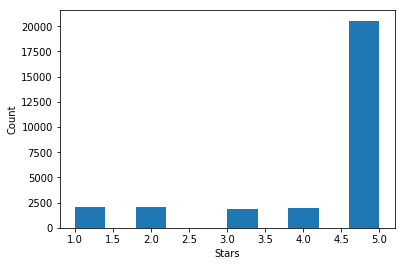

In [30]:
plt.hist(conversation_review['stars']);
plt.xlabel('Stars')
plt.ylabel('Count')

In [31]:
conversation_review.stars.describe()

count    28536.000000
mean         4.295697
std          1.277111
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [32]:
review_table = pd.merge(conversations, conversation_review, on='conversation_id')

In [33]:
print(review_table.shape)
review_table.head()

(28536, 15)


,conversation_id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at,id,content,stars,reviewer_id
0,208294,2017-06-06,2017-06-09,3,2017-05-25 17:06:35.796792,102,NaN,64416,81642,2017-05-26 21:02:09.499404,NaN,73828,Curae donec quam quisque quam.,4,2617
1,208296,2017-06-06,2017-06-12,6,2017-05-26 17:47:38.312937,102,NaN,64414,91348,2017-05-29 01:27:14.256611,NaN,73829,Risus donec scelerisque ultrices commodo nulla.,5,64414
2,208298,2017-05-25,2017-05-28,3,2017-05-15 10:00:03.702143,66,NaN,64411,82832,2017-05-16 00:40:10.332902,NaN,73830,Morbi etiam neque ornare curae senectus nunc b...,5,3312
3,208299,2017-06-24,2017-06-27,3,2017-06-16 04:33:48.793964,108,NaN,64410,86034,2017-06-17 03:08:16.587870,NaN,73831,Lorem ipsum orci velit varius adipiscing nulla.,5,64410
4,208302,2017-05-31,2017-06-04,4,2017-05-22 18:01:37.925072,152,NaN,64407,79555,2017-05-24 19:43:52.731090,NaN,73832,Morbi magna sed fusce facilisis orci condiment...,5,64407


In [34]:
review_table.isnull().sum()

conversation_id           0
start_date                0
end_date                  0
units                     0
added                     0
booking_total             0
cancellation_fault    28536
requester_id              0
service_id                0
booked_at                 0
cancelled_at          28536
id                        0
content                   0
stars                     0
reviewer_id               0
dtype: int64

In [35]:
# Okay so we have some work to do with the NANs.

In [36]:
review_table['booker'] = np.where(review_table['requester_id'] == review_table['reviewer_id'], 'pet_owner', 'service_provider')

In [37]:
review_table.head(2)

,conversation_id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at,id,content,stars,reviewer_id,booker
0,208294,2017-06-06,2017-06-09,3,2017-05-25 17:06:35.796792,102,NaN,64416,81642,2017-05-26 21:02:09.499404,NaN,73828,Curae donec quam quisque quam.,4,2617,service_provider
1,208296,2017-06-06,2017-06-12,6,2017-05-26 17:47:38.312937,102,NaN,64414,91348,2017-05-29 01:27:14.256611,NaN,73829,Risus donec scelerisque ultrices commodo nulla.,5,64414,pet_owner


In [38]:
#This table is a little clunky, lets clean it up
review_table = review_table.drop(['service_id','booked_at','cancelled_at','start_date','end_date',\
                   'units','added','booking_total','cancellation_fault','content'], axis=1)

In [39]:
review_table.head()

,conversation_id,requester_id,id,stars,reviewer_id,booker
0,208294,64416,73828,4,2617,service_provider
1,208296,64414,73829,5,64414,pet_owner
2,208298,64411,73830,5,3312,service_provider
3,208299,64410,73831,5,64410,pet_owner
4,208302,64407,73832,5,64407,pet_owner


In [40]:
#This is a much easier table to work with and analyze. 

In [42]:
reviewers = review_table.groupby('booker')['stars'].count()
reviewers

booker
pet_owner           22493
service_provider     6043
Name: stars, dtype: int64

In [43]:
#It appears from this that the pet owners are more likely to leave a reveiw.

In [44]:
22493 / (22493+6043) * 100

78.82324081861508

In [45]:
#Almost 79% of pet owners leave reviews. Lets check out service providers.

In [46]:
6043 / (22493+6043) * 100

21.176759181384917

In [47]:
#Only about 21% of service providers leave a review. 

# Thoughts 


I think the old addage of "you have a good experience you tell one person, you have a bad experience you tell five" definitely holds true for the service providers. If a stay went well and there was nothing exceptional about the pet (good or bad) a provider might not be inclined to leave a review. In short they probably see it as "business as usual"

Pet owners on the other hand might have more skin in the game so to speak. If service_provider "X" sends lots of pictures and is very active with the pet the owner is more likely to comment on and leave a review of the service provider. As someone who has a dog I know for a fact that my partner and I have reviewed almost every sitter we have had, Beau, my Golden Retriever has always come back super tired, we have received countless pictures and the level of service has been superb. 

# Additional Analysis

I think it would be a fun and worth while to dive into the sentiment analysis of the comments and see what types of words, activities lead to positive or negative reviews. 

Also I think it would be worthwhile to create a photos column with number of photos taken during the stay and see what correlation that has with the number of stars and the overall rating of the service_provider. 